# Age Estimation 

In [1]:
# keep it as the first code cell
import numpy as np
import os
from prepare_data_sgd import *

In [ ]:
epoch = 1000
epoch_sgd = 1000
batch_size = 16
momentum = True
img_d = ''
img_n = []
img_size = 224

# Loading Data

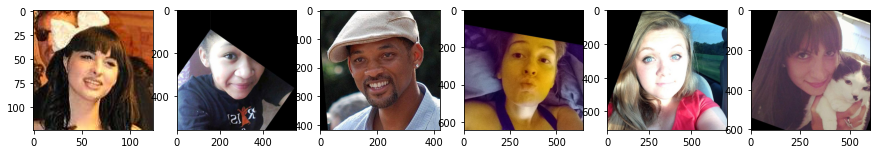

In [2]:
base_dir = 'DATASET/'

age_train, features_train = prepare_data('train', base_dir)
age_val, features_val = prepare_data('val', base_dir)
_, features_test = prepare_data('test', base_dir)
show_data(base_dir)

# Implement Closed Form Solution
```
Arguments:
    age          -- numpy array, shape (n, )
    features     -- numpy array, shape (n, 2048)
Returns:
    weights      -- numpy array, (2048, )
    bias         -- numpy array, (1, )
```

In [3]:
def closed_form_solution(age, features):
    # Preprocess
    H = features
    ones = np.ones(len(H))
    H = np.column_stack((ones,H))
    Y = age.reshape((age.shape[0],1))

    # Calculate the closed form solution
    part1 = np.linalg.inv(np.dot(H.T, H))
    part2 = np.dot(part1, H.T)
    part3 = np.dot(part2, Y)
    weights = part3
    

    # separate the weights and bias
    bias    = weights[0]
    weights    = weights[1:]
    
    return weights, bias

# Validate

Your validate loss is: 67.84


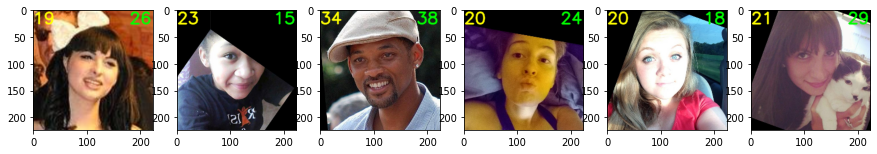

In [4]:
w, b = closed_form_solution(age_train, features_train)
loss, pred = evaluate(w, b, age_val, features_val)
# print("Your validate loss is:", round(loss, 3))

# Test and Generate results file

In [5]:
prediction = test(w, b, features_test, 'cfs.txt')
# print("Test results has saved to cfs.txt")
# print(prediction[:10])

Test results has saved to cfs.txt
[[28.04639956]
 [60.90374503]
 [55.19594967]
 [23.35683535]
 [35.20122169]
 [34.36335503]
 [36.63257243]
 [44.11504397]
 [18.49147783]
 [57.60077162]]


# Implement Gradient descent
Gradient descent is an optimization algorithm used to minimize some function by iteratively moving in the direction of steepest descent as defined by the negative of the gradient. In machine learning, we use gradient descent to update the parameters of our model.

```
Arguments:
    age          -- numpy array, label, (n, )
    feature      -- numpy array, features, (n, 2048)
Return:
    weights      -- numpy array, (2048, )
    bias         -- numpy array, (1, )
```

In [6]:
def gradient_descent(age, feature):
    assert len(age) == len(feature)

    # Init weights and bias
    weights = np.random.randn(feature.shape[1], 1)
    bias = np.random.randn(1, 1)
    
    # Learning rate
    lr = 10e-3
    
    # Preprocess
    H = feature
    Y = age.reshape((age.shape[0],1))
    
    for e in range(epoch):
        # forward pass
        Y_hat = np.dot(H, weights) + bias

        # calculate loss
        loss = np.sum((Y_hat - Y) ** 2)/H.shape[0]
        
        # calculate gradient 
        gradient = (-2 / H.shape[0]) * np.dot(H.T, Y - Y_hat)

        # update weights
        weights = weights - lr * gradient
        
        if momentum:
            pass # You  can also consider the gradient descent with momentum

    return weights, bias

# Train and validate

Your validate score is: 61.215


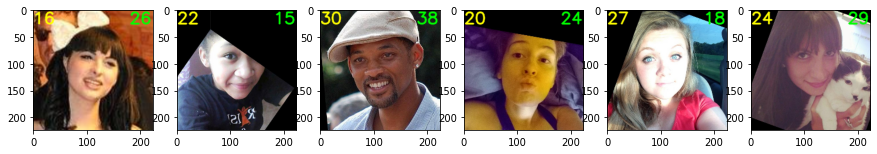

In [7]:
w, b = gradient_descent(age_train, features_train)
loss, pred = evaluate(w, b, age_val, features_val)
# print("Your validate score is:", round(loss, 3))

#  Test and Generate results file

In [8]:
prediction = test(w, b, features_test, 'gd.txt')
# print("Test results has saved to gd.txt")
# print(prediction[:10])

Test results has saved to gd.txt
[[27.93677037]
 [74.70438637]
 [50.29179325]
 [21.85496298]
 [33.86407032]
 [30.70529602]
 [33.23154025]
 [42.16661378]
 [21.72478535]
 [53.27748321]]


# Implement Stochastic Gradient descent
Stochastic Gradient Descent (SGD) is a simple yet very efficient approach to discriminative learning of linear classifiers under convex loss functions such as (linear) Support Vector Machines and Logistic Regression. Even though SGD has been around in the machine learning community for a long time, it has received a considerable amount of attention just recently in the context of large-scale learning.
```
Arguments:
    age          -- numpy array, label, (n, )
    feature      -- numpy array, features, (n, 2048)
Return:
    weights      -- numpy array, (2048, )
    bias         -- numpy array, (1, )
```

In [9]:
def stochastic_gradient_descent(age, feature):
    # check the inputs
    assert len(age) == len(feature)
    
    # Set the random seed
    np.random.seed(0)

    # Init weights and bias
    weights = np.random.randn(feature.shape[1], 1)
    bias = np.random.rand(1, 1)

    # Learning rate
    lr = 10e-5
    
    # Preprocess
    H = feature
    Y = age.reshape((age.shape[0],1))

    # Batch size
    batch_size = 16
 
    # Number of mini-batches
    t = len(age) // batch_size
    if len(age) % batch_size != 0:
        t += 1
#     print(epoch_sgd)
    for e in range(epoch_sgd):
        
        # Shuffle training data
        n = np.random.permutation(len(feature))  
        
        for m in range(t):
            # Providing mini batch with fixed batch size of 16
            batch_feature = feature[n[m * batch_size : (m+1) * batch_size]]
            batch_age = age[n[m * batch_size : (m+1) * batch_size]]
            
            # forward pass
            Y_hat = np.dot(H, weights) + bias

            # calculate loss
            loss = np.sum((Y_hat - Y) ** 2)/H.shape[0]

            # calculate gradient 
            gradient = (-2 / H.shape[0]) * np.dot(H.T, Y - Y_hat)

            # update weights
            weights = weights - lr * gradient
   
                
            if momentum:
                pass # You can also consider the gradient descent with momentum
#         if(e % 100 == 0):
#             print('=> epoch:', e + 1, '  Loss:', round(loss,4))
    return weights, bias

# Train and validate

=> epoch: 1   Loss: 115.6069
=> epoch: 101   Loss: 32.2539
=> epoch: 201   Loss: 29.0525
=> epoch: 301   Loss: 27.5304
=> epoch: 401   Loss: 26.532
=> epoch: 501   Loss: 25.7933
=> epoch: 601   Loss: 25.2114
=> epoch: 701   Loss: 24.7341
=> epoch: 801   Loss: 24.3311
=> epoch: 901   Loss: 23.9836
Your validate score is: 58.221


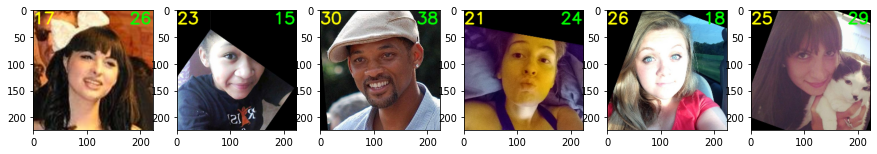

In [10]:
w, b = stochastic_gradient_descent(age_train, features_train)
loss, pred = evaluate(w, b, age_val, features_val)
# print("Your validate score is:", round(loss, 3))

# Test and Generate results file

In [11]:
prediction = test(w, b, features_test, 'sgd.txt')
# print("Test results has saved to sgd.txt")
# print(prediction[:10])

Test results has saved to sgd.txt
[[27.2779574 ]
 [74.07863378]
 [47.88003491]
 [22.34748171]
 [34.55597052]
 [32.23234852]
 [34.93429319]
 [42.10987711]
 [22.12293436]
 [54.8703109 ]]
